In [1]:
using DelimitedFiles
using PyCall
using PyPlot
using Statistics
using DataFrames
using CSV

Precompiling CSV
  ✓ CodecZlib
  ✓ CSV
  2 dependencies successfully precompiled in 21 seconds. 21 already precompiled.


In [2]:
m_C1 = readdlm("../data/figures/data_fig4/m_C1")[:]
m_C1_DCA = readdlm("../data/figures/data_fig4/m_C1_DCA")[:]
m_Csil_DCA = readdlm("../data/figures/data_fig4/m_Csil_DCA")[:]

m_E1 = readdlm("../data/figures/data_fig4/m_E1")[:]
m_E1_DCA = readdlm("../data/figures/data_fig4/m_E1_DCA")[:]
m_Esil_DCA = readdlm("../data/figures/data_fig4/m_Esil_DCA")[:]

X_DCA = readdlm("../data/figures/data_fig4/x_DCA")[:] ./ 0.76
X_exp = readdlm("../data/figures/data_fig4/x_exp")[:] ./ 0.76

st_C1 = readdlm("../data/figures/data_fig4/st_C1")[:]
st_C1_DCA = readdlm("../data/figures/data_fig4/st_C1_DCA")[:]
st_Csil_DCA = readdlm("../data/figures/data_fig4/st_Csil_DCA")[:]

st_E1 = readdlm("../data/figures/data_fig4/st_E1")[:]
st_E1_DCA = readdlm("../data/figures/data_fig4/st_E1_DCA")[:]
st_Esil_DCA = readdlm("../data/figures/data_fig4/st_Esil_DCA")[:]
;

In [3]:
dF = readdlm("../data/figures/data_fig4/exp_fitness")[:]
dE = readdlm("../data/figures/data_fig4/dca_scores")[:]
;

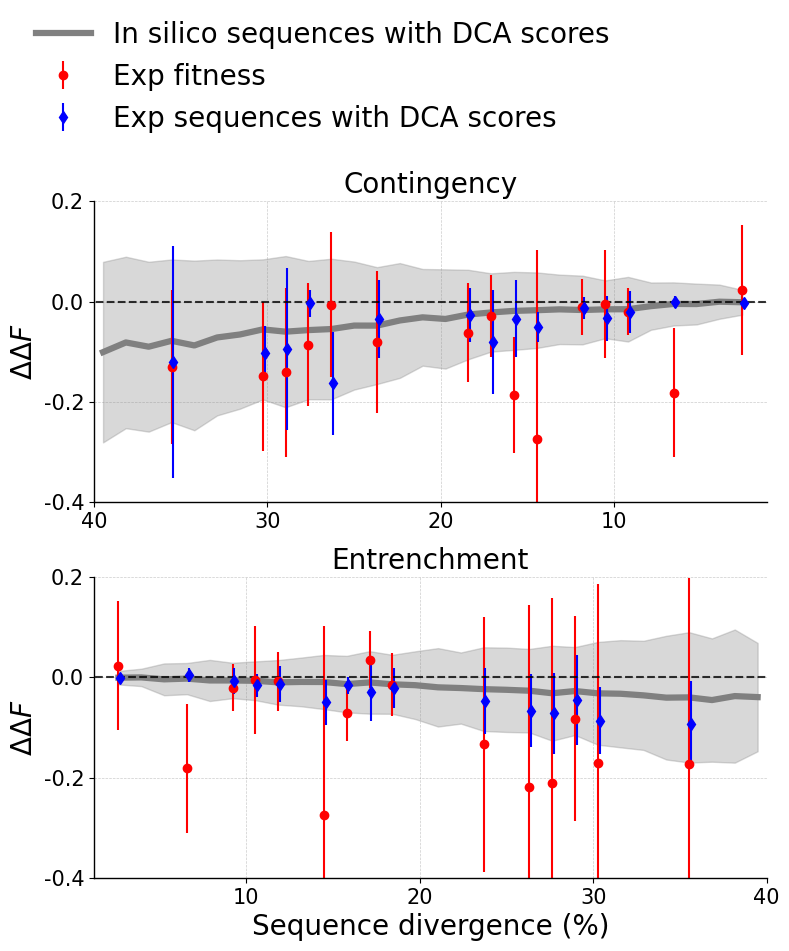

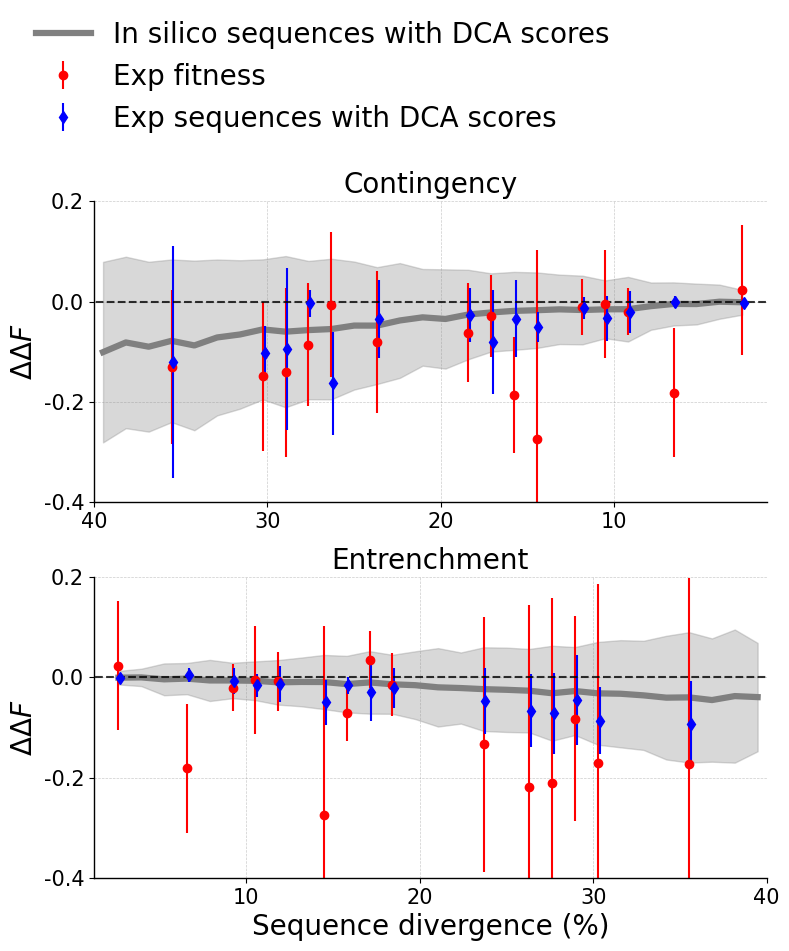

In [18]:
close("all")

pointsize = 80
transp = 0.8
transp2 = 0.8

lab = [-0.4,-0.2,0.,0.2]
lab2 = lab
labx = [0, 10, 20, 30, 40]
axis_width = 1.

ticks_font = 15
axis_font = 20

spessore = 4.5


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)


#ax1 = plt.subplot2grid(shape=(6, 4), loc=(2, 0), colspan = 3, rowspan= 2)
ax2 = plt.subplot2grid(shape=(2, 1), loc=(0, 0), colspan = 1, rowspan= 1)
ax3 = plt.subplot2grid(shape=(2, 1), loc=(1, 0), colspan = 1, rowspan= 1)
fig.subplots_adjust(hspace=0.8)


y = m_Csil_DCA
err_y = st_Csil_DCA
ax2.plot(X_DCA, y, linewidth = spessore, color = "grey", label = "In silico sequences with DCA scores")
ax2.fill_between(X_DCA, y .- err_y, y .+ err_y, alpha=0.3, color = "grey")
ax2.errorbar(X_exp, m_C1, yerr = st_C1, fmt = "o", color = "red", label = "Exp fitness")
ax2.errorbar(X_DCA .- 0.1, m_C1_DCA, yerr = st_C1_DCA, fmt = "d", color = "blue", label = "Exp sequences with DCA scores")
ax2.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax2.plot([0, maximum(labx)], [0, 0], linestyle="--", alpha = transp2, color = "black")
#ax2.set_xlabel("Backward Monte Carlo steps", fontsize=axis_font)
ax2.set_ylabel("\$\\Delta\$\$\\Delta{F}\$", fontsize=axis_font)
ax2.set_xticks(labx)
ax2.set_xticklabels(labx, fontsize = ticks_font)
ax2.set_yticks(lab2)
ax2.set_yticklabels(lab2, fontsize = ticks_font)
ax2.set_xlim(minimum(X_DCA)-0.1,maximum(labx))
ax2.set_ylim(minimum(lab2),maximum(lab2))
ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.set_title("Contingency", fontsize = axis_font)
ax2.invert_xaxis()

y = m_Esil_DCA
err_y = st_Esil_DCA
ax3.plot(X_DCA, y, linewidth = spessore, color = "grey")
ax3.fill_between(X_DCA, y .- err_y, y .+ err_y, alpha=0.3, color = "grey")
ax3.errorbar(X_exp, m_E1, yerr = st_E1, fmt = "o", color = "red")
ax3.errorbar(X_DCA .+ 0.1, m_E1_DCA, yerr = st_E1_DCA, fmt = "d", color = "blue")
ax3.plot([0, maximum(labx)], [0, 0], linestyle="--", alpha = transp2, color = "black")
ax3.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax3.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax3.set_ylabel("\$\\Delta\$\$\\Delta{F}\$", fontsize=axis_font)
ax3.set_xticks(labx)
ax3.set_xticklabels(labx, fontsize = ticks_font)
ax3.set_yticks(lab2)
ax3.set_yticklabels(lab2, fontsize = ticks_font)
ax3.set_xlim(minimum(X_DCA)-0.1,maximum(labx))
ax3.set_ylim(minimum(lab2),maximum(lab2))
ax3.spines["top"].set_visible(false)
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_linewidth(axis_width)
ax3.spines["bottom"].set_linewidth(axis_width)
ax3.set_title("Entrenchment", fontsize = axis_font)

tight_layout()
fig.legend(loc="upper right", fontsize = axis_font, frameon = false, ncol = 1, bbox_to_anchor=(0.8, 1.2))

savefig("../data/figures/4AB.png", dpi = 300, bbox_inches="tight")
gcf()

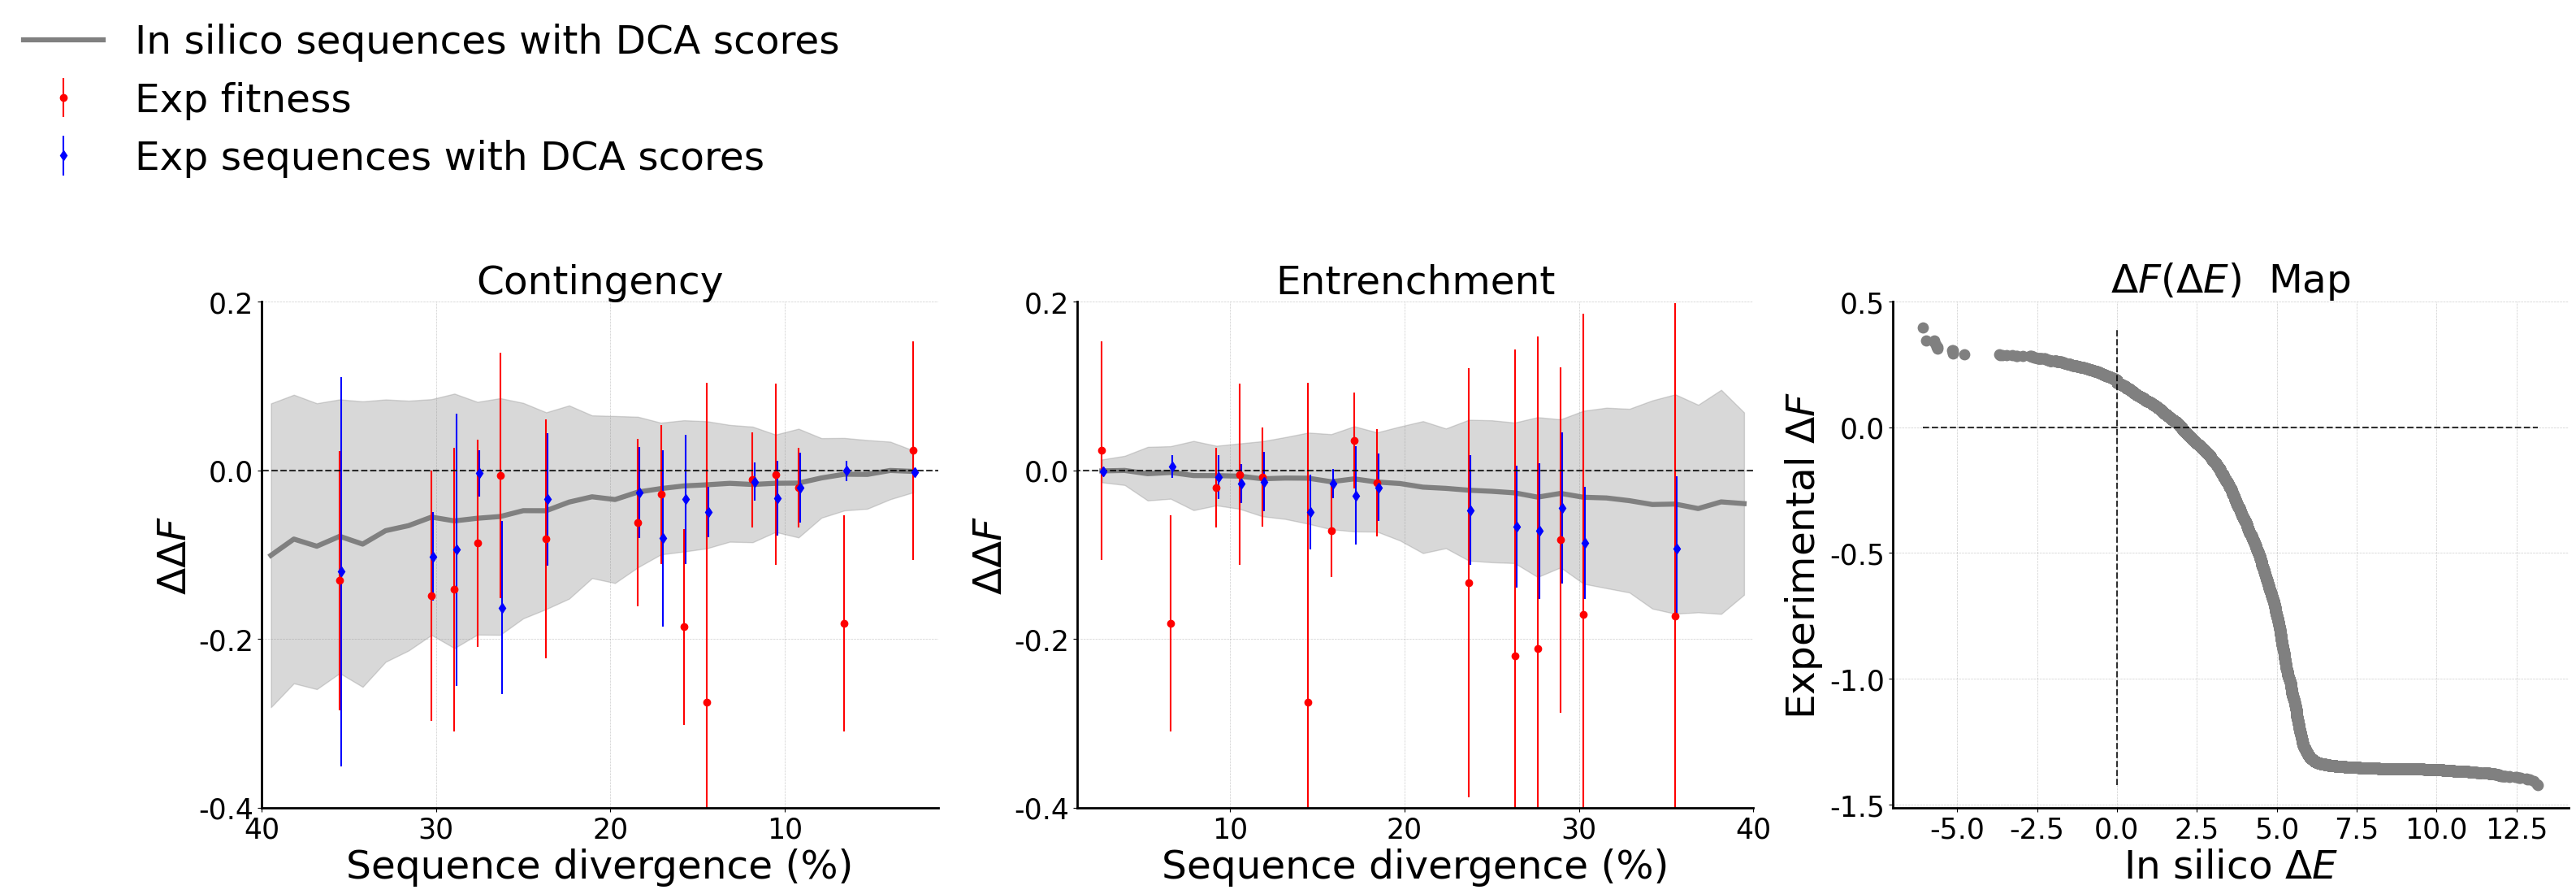

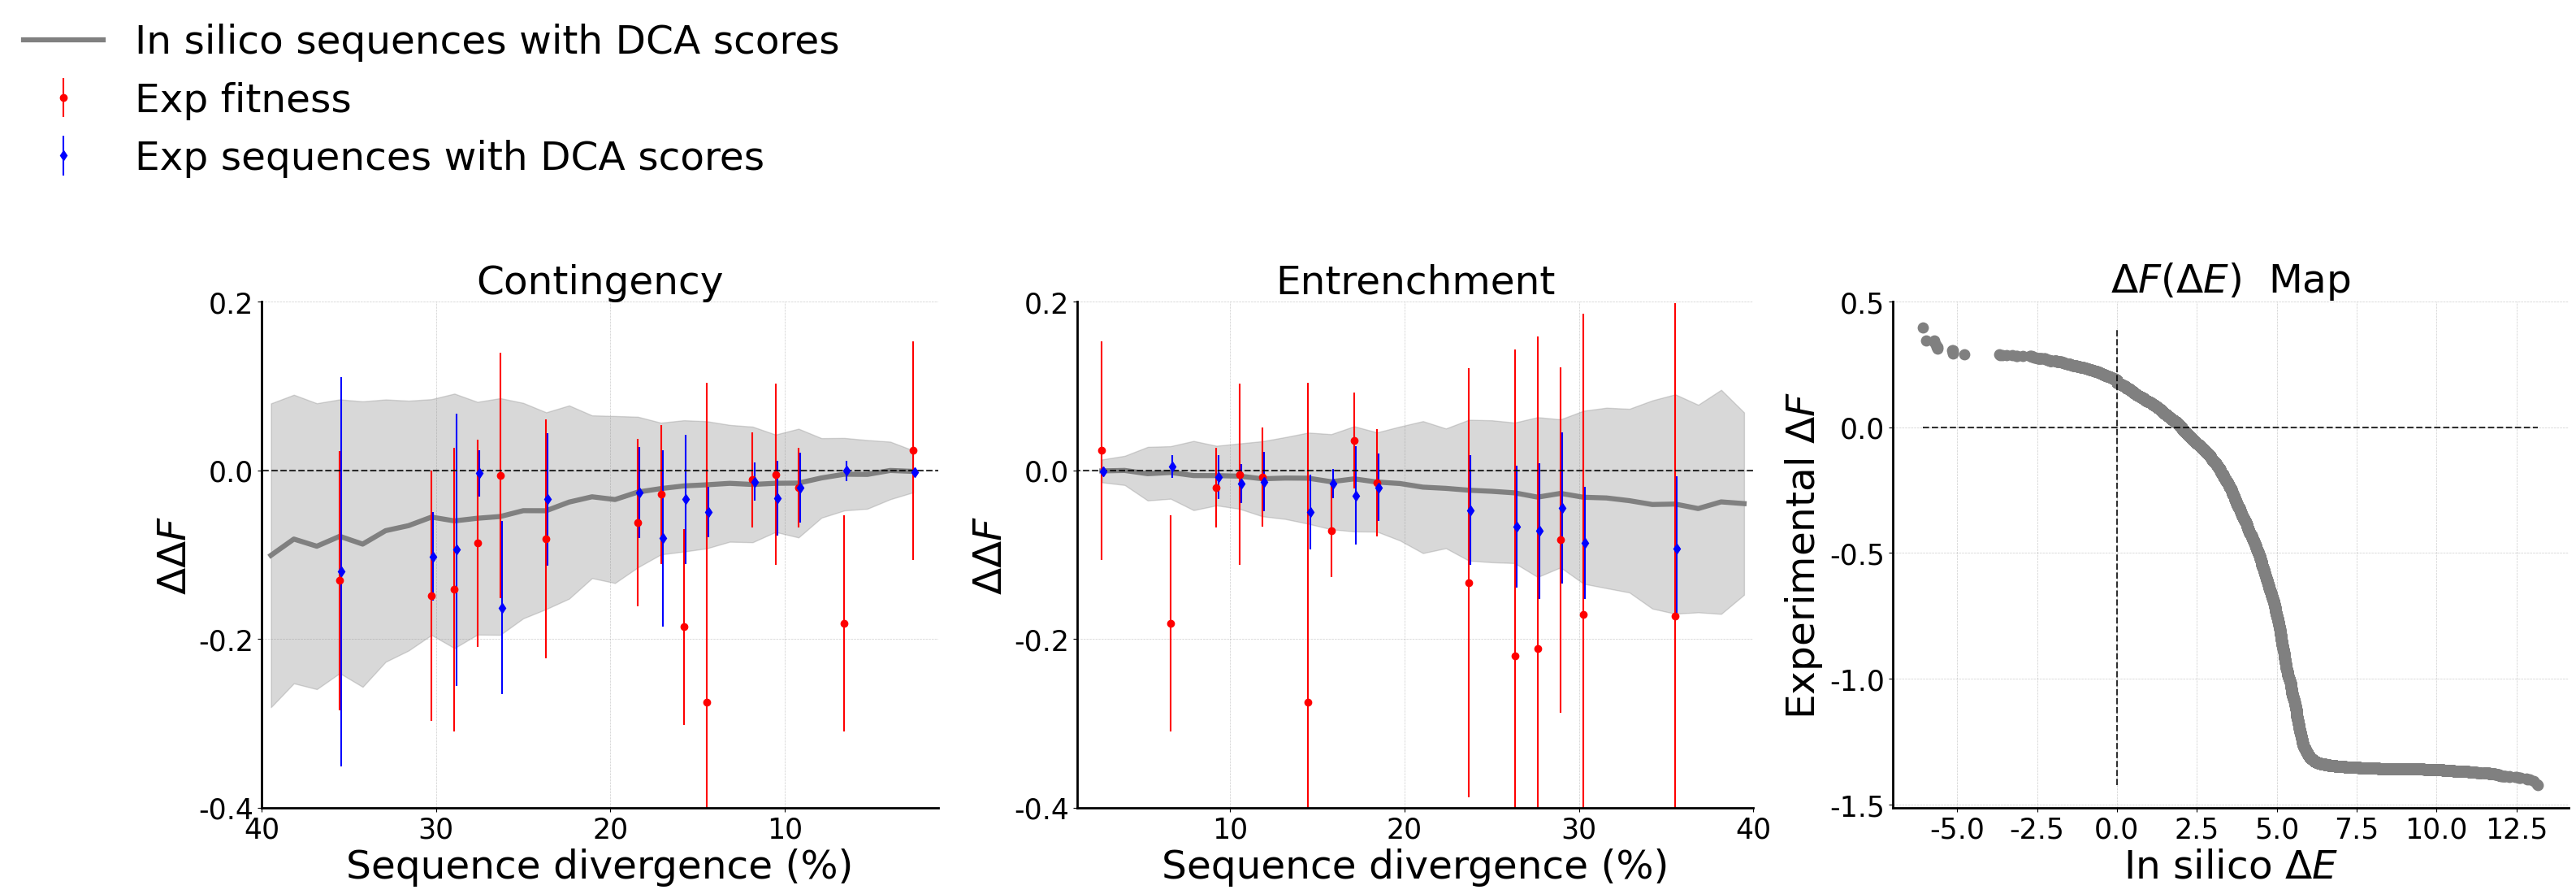

In [25]:
close("all")

pointsize = 200
transp = 0.8
transp2 = 0.8

lab = [-0.4,-0.2,0.,0.2]
lab2 = lab
labx = [0, 10, 20, 30, 40]
axis_width = 2.

ticks_font = 25
axis_font = 35

spessore = 4.5

N_sites = 202


point = 80


lab1x = [-5., -2.5, 0., 2.5, 5.0, 7.5, 10., 12.5]
lab1y = [-1.5, -1,-0.5, 0., 0.5]



fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(30)

shapex = 1
shapey = 3

#ax1 = plt.subplot2grid(shape=(6, 4), loc=(2, 0), colspan = 3, rowspan= 2)
ax1 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 2), colspan = 1, rowspan= 1)
ax2 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 0), colspan = 1, rowspan= 1)
ax3 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 1), colspan = 1, rowspan= 1)
fig.subplots_adjust(hspace=0.8)


y = m_Csil_DCA
err_y = st_Csil_DCA
ax2.plot(X_DCA, y, linewidth = spessore, color = "grey", label = "In silico sequences with DCA scores")
ax2.fill_between(X_DCA, y .- err_y, y .+ err_y, alpha=0.3, color = "grey")
ax2.errorbar(X_exp, m_C1, yerr = st_C1, fmt = "o", color = "red", label = "Exp fitness")
ax2.errorbar(X_DCA .- 0.1, m_C1_DCA, yerr = st_C1_DCA, fmt = "d", color = "blue", label = "Exp sequences with DCA scores")
ax2.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax2.plot([0, maximum(labx)], [0, 0], linestyle="--", alpha = transp2, color = "black")
#ax2.set_xlabel("Backward Monte Carlo steps", fontsize=axis_font)
ax2.set_ylabel("\$\\Delta\$\$\\Delta{F}\$", fontsize=axis_font)
ax2.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax2.set_xticks(labx)
ax2.set_xticklabels(labx, fontsize = ticks_font)
ax2.set_yticks(lab2)
ax2.set_yticklabels(lab2, fontsize = ticks_font)
ax2.set_xlim(minimum(X_DCA)-0.1,maximum(labx))
ax2.set_ylim(minimum(lab2),maximum(lab2))
ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.set_title("Contingency", fontsize = axis_font)
ax2.invert_xaxis()

y = m_Esil_DCA
err_y = st_Esil_DCA
ax3.plot(X_DCA, y, linewidth = spessore, color = "grey")
ax3.fill_between(X_DCA, y .- err_y, y .+ err_y, alpha=0.3, color = "grey")
ax3.errorbar(X_exp, m_E1, yerr = st_E1, fmt = "o", color = "red")
ax3.errorbar(X_DCA .+ 0.1, m_E1_DCA, yerr = st_E1_DCA, fmt = "d", color = "blue")
ax3.plot([0, maximum(labx)], [0, 0], linestyle="--", alpha = transp2, color = "black")
ax3.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax3.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax3.set_ylabel("\$\\Delta\$\$\\Delta{F}\$", fontsize=axis_font)
ax3.set_xticks(labx)
ax3.set_xticklabels(labx, fontsize = ticks_font)
ax3.set_yticks(lab2)
ax3.set_yticklabels(lab2, fontsize = ticks_font)
ax3.set_xlim(minimum(X_DCA)-0.1,maximum(labx))
ax3.set_ylim(minimum(lab2),maximum(lab2))
ax3.spines["top"].set_visible(false)
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_linewidth(axis_width)
ax3.spines["bottom"].set_linewidth(axis_width)
ax3.set_title("Entrenchment", fontsize = axis_font)


# plotting subplots
ax1.scatter(dE, dF, color = "grey", s = point)
ax1.plot([minimum(dE), maximum(dE)], [0, 0], color = "black", linestyle = "--", alpha = 0.8)
ax1.plot([0, 0], [minimum(dF), maximum(dF)], color = "black", linestyle = "--", alpha = 0.8)

ax1.spines["top"].set_visible(false)
ax1.spines["right"].set_visible(false)
ax1.spines["left"].set_linewidth(axis_width)
ax1.spines["bottom"].set_linewidth(axis_width)
ax1.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax1.set_ylabel("Experimental \$\\Delta{F}\$", fontsize=axis_font)
ax1.set_xlabel("In silico \$\\Delta{E}\$", fontsize=axis_font)
ax1.set_title("\$\\Delta{F}\$(\$\\Delta{E}\$)  Map", fontsize=axis_font)
ax1.set_xticks(lab1x)
ax1.set_yticks(lab1y)
ax1.set_xticklabels(lab1x, fontsize = ticks_font)
ax1.set_yticklabels(lab1y, fontsize = ticks_font)

tight_layout()
fig.legend(loc="upper right", fontsize = axis_font, frameon = false, ncol = 1, bbox_to_anchor=(0.3, 1.4))

#savefig("../data/figures/4ABC.png", dpi = 300, bbox_inches="tight")
gcf()

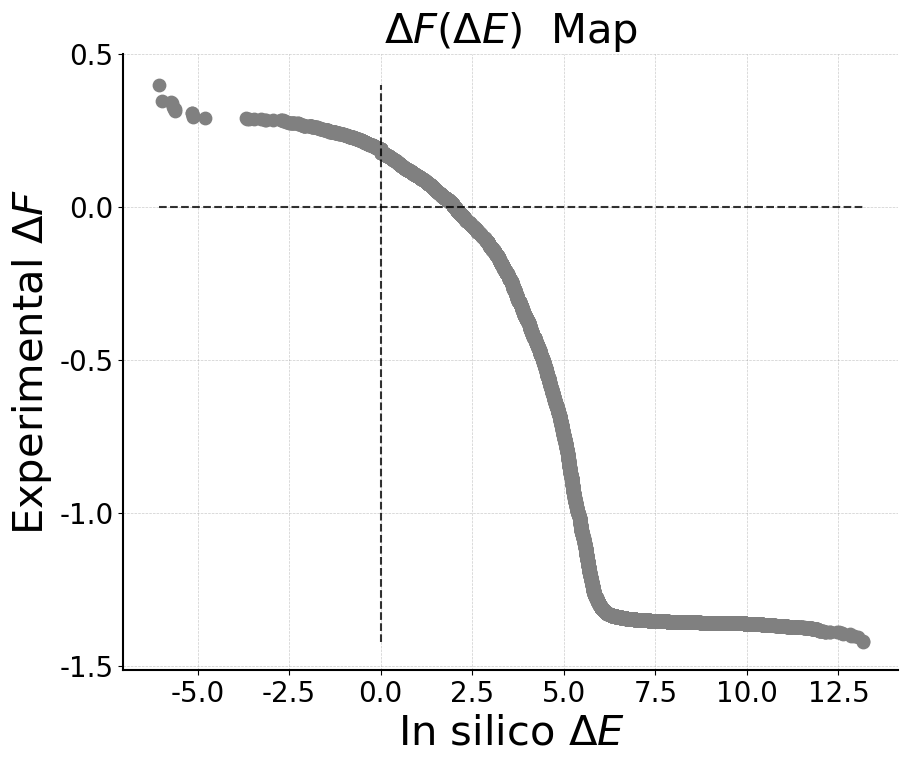

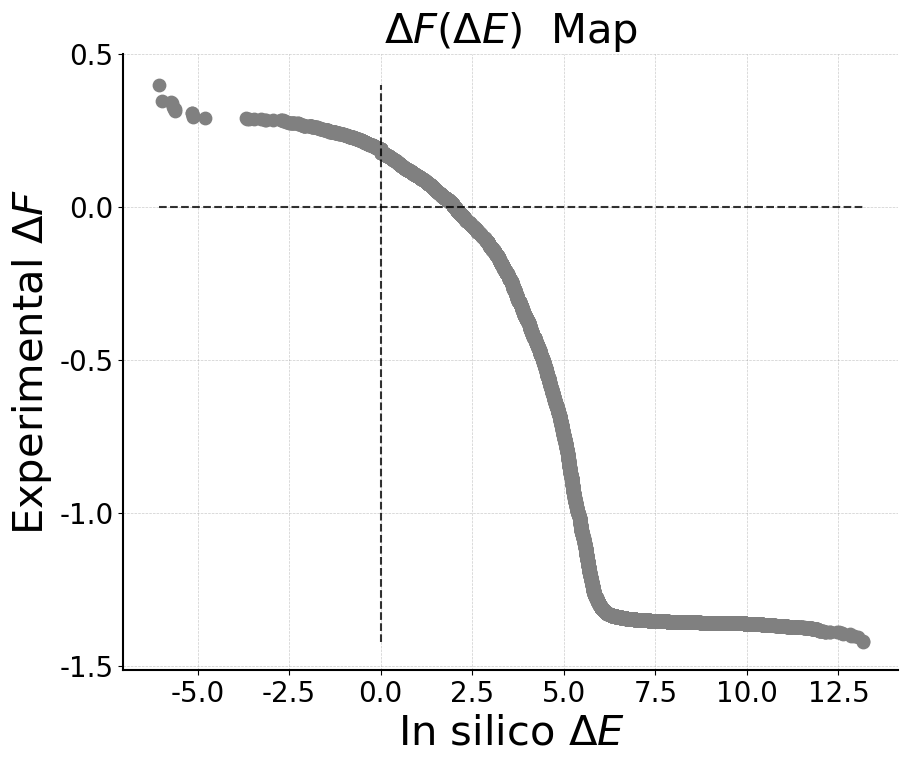

In [4]:
close("all")


axis_width = 1.5

ticks_font = 20
axis_font = 30
spessore = 4.5
N_sites = 202
transp = 0.3

point = 80


lab1x = [-5., -2.5, 0., 2.5, 5.0, 7.5, 10., 12.5]
lab1y = [-1.5, -1,-0.5, 0., 0.5]


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)
shapex = 1
shapey = 1

ax1 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 0), colspan = 1, rowspan= 1)

# plotting subplots
ax1.scatter(dE, dF, color = "grey", s = point)
ax1.plot([minimum(dE), maximum(dE)], [0, 0], color = "black", linestyle = "--", alpha = 0.8)
ax1.plot([0, 0], [minimum(dF), maximum(dF)], color = "black", linestyle = "--", alpha = 0.8)

ax1.spines["top"].set_visible(false)
ax1.spines["right"].set_visible(false)
ax1.spines["left"].set_linewidth(axis_width)
ax1.spines["bottom"].set_linewidth(axis_width)
ax1.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax1.set_ylabel("Experimental \$\\Delta{F}\$", fontsize=axis_font)
ax1.set_xlabel("In silico \$\\Delta{E}\$", fontsize=axis_font)
ax1.set_title("\$\\Delta{F}\$(\$\\Delta{E}\$)  Map", fontsize=axis_font)
ax1.set_xticks(lab1x)
ax1.set_yticks(lab1y)
ax1.set_xticklabels(lab1x, fontsize = ticks_font)
ax1.set_yticklabels(lab1y, fontsize = ticks_font)

savefig("../data/figures/4C.png", dpi =500, bbox_inches="tight")
gcf()